In [1]:
"""
Random Forest
Global Feature Selection 
    - X = 'Depth (m)', 'σ,v (kPa)', 'σ',v (kPa)', 'SBT (-)', 'SBTn (-)',
    'Mod. SBTn (-)', 'Oberhollenzer_classes', 'iso_classes_encoded'.

    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns='Unnamed: 0')

#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [1, 11, 17, 18, 19]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Ic (-)' --> index: 21
#8 --> 'Ic SBT (-)' --> index:22 
#9 --> 'Ib (-)' --> index: 23
#10 --> 'Oberhollenzer_classes' --> index: 24
#11 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

#y=y.to(device) #To GPU

#Scaling the and preparing the data
#scalerX = MinMaxScaler()
#scalerY = MinMaxScaler()

#Scaling the Data
#scaledX=scalerX.fit_transform(X)
#scaledY=scalerY.fit_transform(y)

#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.ensemble import RandomForestRegressor
#Random forest Model
model = RandomForestRegressor(bootstrap = 'True', n_estimators = 400, max_depth = 300,
                              min_samples_split = 15, min_samples_leaf = 2)


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 15.82 minutes


In [4]:
#Making a prediction
y_pred = model.predict(X_test)

In [5]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_test, y_pred)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_test, y_pred)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_test, y_pred)
print('The R2 is: %.4f' %r2)

print('____________________________________________')
#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
print('The mae is: %.4f MPa' %mae_qc)
mse_qc = mean_squared_error(y_test[:, 0], y_pred[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y_test[:, 0], y_pred[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
print('The mae is: %.4f kPa' %mae_fs)
mse_fs = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y_test[:, 1], y_pred[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The mae is: 13.0151
The mse is: 1198.8846
The rmse is: 34.6249
The R2 is: 0.6699
____________________________________________
Metrics for qc
The mae is: 1.4368 MPa
The mse is: 12.8039 MPa
The rmse is: 34.6249 MPa
The R2 is: 0.8096 MPa
____________________________________________
Metrics for fs
The mae is: 24.5934 kPa
The mse is: 2384.9654 kPa
The rmse is: 34.6249 kPa
The R2 is: 0.5301 kPa


In [6]:
'''
Saving the Model
'''
import joblib

#Saving model as joblib file
import os
joblib.dump(model, 'CPT_RF_02_88_06_compress.sav', compress = 5)
#print(f"Compressed Random Forest: {np.round(os.path.getsize('CPT_RF_02_88_06_compress.joblib') / 1024 / 1024, 2) } MB")

['CPT_RF_02_88_06_compress.sav']

In [ ]:
#Loading as a test
train_model = joblib.load('CPT_RF_02_88_06_compress.sav')

________________________________________________________________________________
Sampling DataBase to predict variables with:

'Depth (m)', "σ',v (kPa)", 'SBT (-)', 'SBTn (-)' & 'Mod. SBTn (-)'

________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_sample.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Combined', 'Combined_weight'], axis = 1)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
'''
Inputs
'''
X = df_cpt[:, [1, 4, 5, 6, 7]]

#1 --> 'Depth (m)' --> index: 1
#2 --> "σ',v (kPa)" --> index: 4
#3 --> 'SBT (-)' --> index: 5
#4 --> 'SBTn (-)' --> index: 6
#5 --> 'Mod. SBTn (-)' --> index: 7 

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

________________________________________________________________________________
Predictions
________________________________________________________________________________

In [ ]:
#Making a prediction
y_pred_sample = model.predict(X)

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y, y_pred_sample)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y, y_pred_sample)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y, y_pred_sample)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y[:, 0], y_pred_sample[:, 0])
print('The mae is: %.4f MPa' %mae_qc)
mse_qc = mean_squared_error(y[:, 0], y_pred_sample[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y[:, 0], y_pred_sample[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y[:, 1], y_pred_sample[:, 1])
print('The mae is: %.4f kPa' %mae_fs)
mse_fs = mean_squared_error(y[:, 1], y_pred_sample[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y[:, 1], y_pred_sample[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The mae is: 13.7248
The mse is: 1237.8727
The rmse is: 35.1834
The R2 is: 0.6957
____________________________________________
Metrics for qc
The mae is: 1.5043 MPa
The mse is: 10.8861 MPa
The rmse is: 35.1834 MPa
The R2 is: 0.6594 MPa
____________________________________________
Metrics for fs
The mae is: 25.9454 kPa
The mse is: 2464.8592 kPa
The rmse is: 35.1834 kPa
The R2 is: 0.7319 kPa


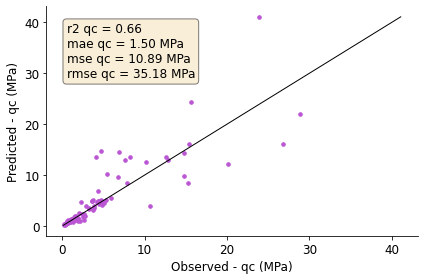

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 qc = %.2f' % (r2_qc), r'mae qc = %.2f MPa' % (mae_qc, ),r'mse qc = %.2f MPa' % (mse_qc, ), 
                     r'rmse qc = %.2f MPa' % (rmse_qc, )))

p1 = max(max(y_pred_sample[:, 0]), max(y[:, 0]))
p2 = min(min(y_pred_sample[:, 0]), min(y[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 0], y_pred_sample[:, 0], s = 50, c = 'mediumorchid', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.5, 40, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('Scptu_qc', dpi = 600)

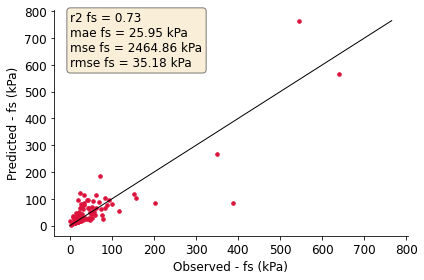

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 fs = %.2f' % (r2_fs), r'mae fs = %.2f kPa' % (mae_fs, ),r'mse fs = %.2f kPa' % (mse_fs, ), 
                     r'rmse fs = %.2f kPa' % (rmse_fs, )))

p1 = max(max(y_pred_sample[:, 1]), max(y[:, 1]))
p2 = min(min(y_pred_sample[:, 1]), min(y[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 1], y_pred_sample[:, 1], s = 50, c = 'crimson', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 800, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('Scptu_fs', dpi = 600)